<a href="https://colab.research.google.com/github/chelynl/Machine_Learning/blob/main/13_Association_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Association Analysis (Market Basket Analysis)**
- Unsupervised learning
- Data comes in form of transactions (want to learn about relationships hidden from transactions)
- Involves ***antecedent*** and ***consequent***
- Gives us sets of products that are likely to be purchased together
- Strength of association rule is measured by ***support***, ***confidence***, and ***lift***
- Used in retail for coupon marketing, targeted upselling, and product placement
- To perform analysis on any software, you need to specify:
 - `The Basket` = something that identifies the basket of items being purchased simultaneously by a single customer
 - `The items` = whatever column itemizes the transaction of each basket
<br>
<br>
***

### Support
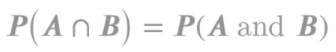<br>
- measures how often we find instances of this rule in the training data
- how often does this "rule" present itself? (in ___% of transactions)


### Confidence
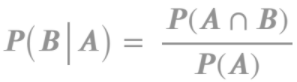<br>
- measures what percent of transactions containing A also contain B
- given one buys A, what is the chance they also buy B? ( ___% of A purchases also contained B)

### Lift
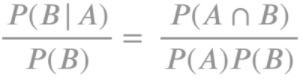<br>
- measures how much more likely are we to buy B given that we also buy A than we are to buy B at random
- want lift values greater than 1
- how much more likely are we to see B purchases with A purchases than see B overall? ( ___ times more likely to see B purchased with A than B purchased at random)

***

## Post-Hoc Takeaways
Product A --> Product B
- B as consequent: determine what can be done to boost its sales
 - product placement
 - optimize upselling
 - coupons for related products
- A as antecedent: determine what other products would be affected by changes to product A
 - discontinuations
 - price changes
 - cannibalization

 ***

## A --> B vs. B --> A
 - same support
 - same lift
 - different confidence
 - no time component (we do NOT say those who buy A will then buy B)  

## Method 1: Use when transactions are listed as strings (difficult to convert to one-hot encoding)

The data provided from this example is perfect for method 1.

In [ ]:
!pip install apyori
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [ ]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/chelynl/ML_notes/main/association_rule_learning/Market_Basket_Optimisation.csv?token=AMGO4MGIA4P6Y5MRP3J245TA2EGBU', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create list to hold transactions (basically each row from df is an element)
transactions = []

# Iterate over each transaction and append all items in that row to the list
for row in range(0, 7501):
  transactions.append([str(df.values[row, col]) for col in range(0, 20)])

In [ ]:
# Train apriori model
# Only looking at 2 items at a time with defined minimum support, confidence, and lift
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [ ]:
# See results
results = list(rules)
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [ ]:
# Function to clean results
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]

    # Get list of tuples with clean results
    return list(zip(lhs, rhs, supports, confidences, lifts))

In [ ]:
# Get clean results df  
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


In [ ]:
# Display results in descending lifts
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


## Method 2: Convert to one-hot encoding

In [ ]:
# Load dependencies
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# See how many transactions we are dealing with
print(df.shape)

(7501, 20)


In [ ]:
"""
The apriori() function requires df to be in one-hot-encoding format.
This function converts the data to the correct format.
"""

def one_hot_format(data):

  # Every item from total transactions
  items = []
  for row in range(data.shape[0]):
    for item in data.iloc[row][~data.iloc[row].isna()]:
      items.append(item.strip())

  # Unique items from total transactions
  unique_items = list(set(items))

  # Create empty dict to hold binary values for each item
  items_dict = {}
  for i in unique_items:
    items_dict[i] = []

  # Iterate over items in each row and add 1 for item and 0 for NaN values
  count = 0
  for row in range(data.shape[0]):
    for col in range(data.shape[1]):
      if data.iloc[row, col] in unique_items:
        items_dict[data.iloc[row, col]].append(1)
    for k in items_dict.keys():
      if len(items_dict[k])==count:
        items_dict[k].append(0)
    count += 1

  # Get final df
  return pd.DataFrame(items_dict)

In [ ]:
new_df = one_hot_format(df)
new_df

,pancakes,shrimp,cream,olive oil,mayonnaise,bramble,almonds,yams,nonfat milk,spinach,ground beef,shampoo,cake,carrots,salt,sandwich,tomato sauce,candy bars,shallot,tomatoes,napkins,light cream,energy bar,chocolate,chili,milk,chutney,corn,cider,barbecue sauce,babies food,cottage cheese,strawberries,toothpaste,avocado,hot dogs,muffins,energy drink,pickles,ham,...,butter,melons,dessert wine,water spray,eggplant,bug spray,oatmeal,chicken,oil,cereals,green grapes,fresh bread,black tea,green tea,whole wheat rice,red wine,mashed potato,asparagus,sparkling water,strong cheese,whole weat flour,salad,light mayo,champagne,bacon,mineral water,cookies,frozen vegetables,extra dark chocolate,magazines,clothes accessories,mushroom cream sauce,whole wheat pasta,cooking oil,green beans,zucchini,cauliflower,gums,burgers,grated cheese
0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
7498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now that we have one-hot encoding df, we can make frequent item sets that have a support of at least 0.5%
# 0.5% was low enough to get data; arbitrary selection
# use_colnames=True means we will use col names as items
frequent_itemsets = apriori(new_df, min_support=0.003, use_colnames=True)

# Generate rules with associated support, confidence, and lift metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Make new columns for number of items in antecedent and consequent
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))

In [ ]:
frequent_itemsets

,support,itemsets
0,0.095054,(pancakes)
1,0.071457,(shrimp)
2,0.065858,(olive oil)
3,0.006133,(mayonnaise)
4,0.020397,(almonds)
...,...,...
1439,0.004399,"(mineral water, eggs, milk, spaghetti)"
1440,0.004533,"(mineral water, spaghetti, frozen vegetables, ..."
1441,0.003066,"(mineral water, frozen vegetables, soup, milk)"
1442,0.003733,"(mineral water, eggs, frozen vegetables, milk)"


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
0,(pancakes),(shrimp),0.095054,0.071457,0.010532,0.110799,1.550572,0.003740,1.044245,1,1
1,(shrimp),(pancakes),0.071457,0.095054,0.010532,0.147388,1.550572,0.003740,1.061381,1,1
2,(pancakes),(olive oil),0.095054,0.065858,0.010799,0.113604,1.724994,0.004539,1.053866,1,1
3,(olive oil),(pancakes),0.065858,0.095054,0.010799,0.163968,1.724994,0.004539,1.082429,1,1
4,(pancakes),(almonds),0.095054,0.020397,0.003066,0.032258,1.581489,0.001127,1.012256,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4877,"(spaghetti, french fries)","(mineral water, eggs)",0.027596,0.050927,0.003066,0.111111,2.181792,0.001661,1.067708,2,2
4878,(mineral water),"(eggs, spaghetti, french fries)",0.238368,0.007999,0.003066,0.012864,1.608156,0.001160,1.004928,1,3
4879,(eggs),"(mineral water, spaghetti, french fries)",0.179709,0.010132,0.003066,0.017062,1.684006,0.001245,1.007051,1,3
4880,(spaghetti),"(mineral water, eggs, french fries)",0.174110,0.006932,0.003066,0.017611,2.540391,0.001859,1.010870,1,3


In [ ]:
# We will only consider rules of 1v1 items
# Limit antecedent and consequent to 1 item each
rules = rules[(rules['antecedent_len']==1) & (rules['consequent_len']==1)]

In [ ]:
rules.nlargest(n=10, columns='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
778,(honey),(fromage blanc),0.047460,0.013598,0.003333,0.070225,5.164271,0.002688,1.060903,1,1
779,(fromage blanc),(honey),0.013598,0.047460,0.003333,0.245098,5.164271,0.002688,1.261806,1,1
480,(chicken),(light cream),0.059992,0.015598,0.004533,0.075556,4.843951,0.003597,1.064858,1,1
481,(light cream),(chicken),0.015598,0.059992,0.004533,0.290598,4.843951,0.003597,1.325072,1,1
942,(pasta),(escalope),0.015731,0.079323,0.005866,0.372881,4.700812,0.004618,1.468107,1,1
943,(escalope),(pasta),0.079323,0.015731,0.005866,0.073950,4.700812,0.004618,1.062867,1,1
116,(pasta),(shrimp),0.015731,0.071457,0.005066,0.322034,4.506672,0.003942,1.369601,1,1
117,(shrimp),(pasta),0.071457,0.015731,0.005066,0.070896,4.506672,0.003942,1.059374,1,1
218,(whole wheat pasta),(olive oil),0.029463,0.065858,0.007999,0.271493,4.122410,0.006059,1.282270,1,1
219,(olive oil),(whole wheat pasta),0.065858,0.029463,0.007999,0.121457,4.122410,0.006059,1.104713,1,1
